---
# Lecture notes - k nearest neighbours, KNN
---

This is the lecture note for **KNN**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to KNN. I encourage you to read further about KNN. </p>

Read more:

- [KNN wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [KNeighborClassifier sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

---


In [198]:
from sklearn.datasets import load_wine
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

---
## Wine data EDA

In [199]:
wine = load_wine()

wine # looks like json, everything put in a dictionary, can access like dictionary below

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [200]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [201]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [202]:
wine.feature_names # same as above

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [203]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [204]:
wine.DESCR # not well formatted, probably needs to be printed

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [205]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns = ["wine_class"])], axis = 1)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [207]:
df["wine_class"].value_counts()

1    71
0    59
2    48
Name: wine_class, dtype: int64

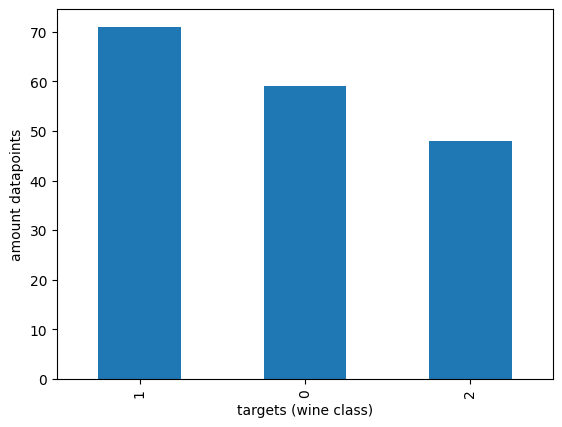

In [208]:
df["wine_class"].value_counts().plot(kind = "bar")
plt.xlabel("targets (wine class)")
plt.ylabel("amount datapoints");

In [209]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [210]:
# sns.pairplot(df) - hard to see, have to choose which features to plot

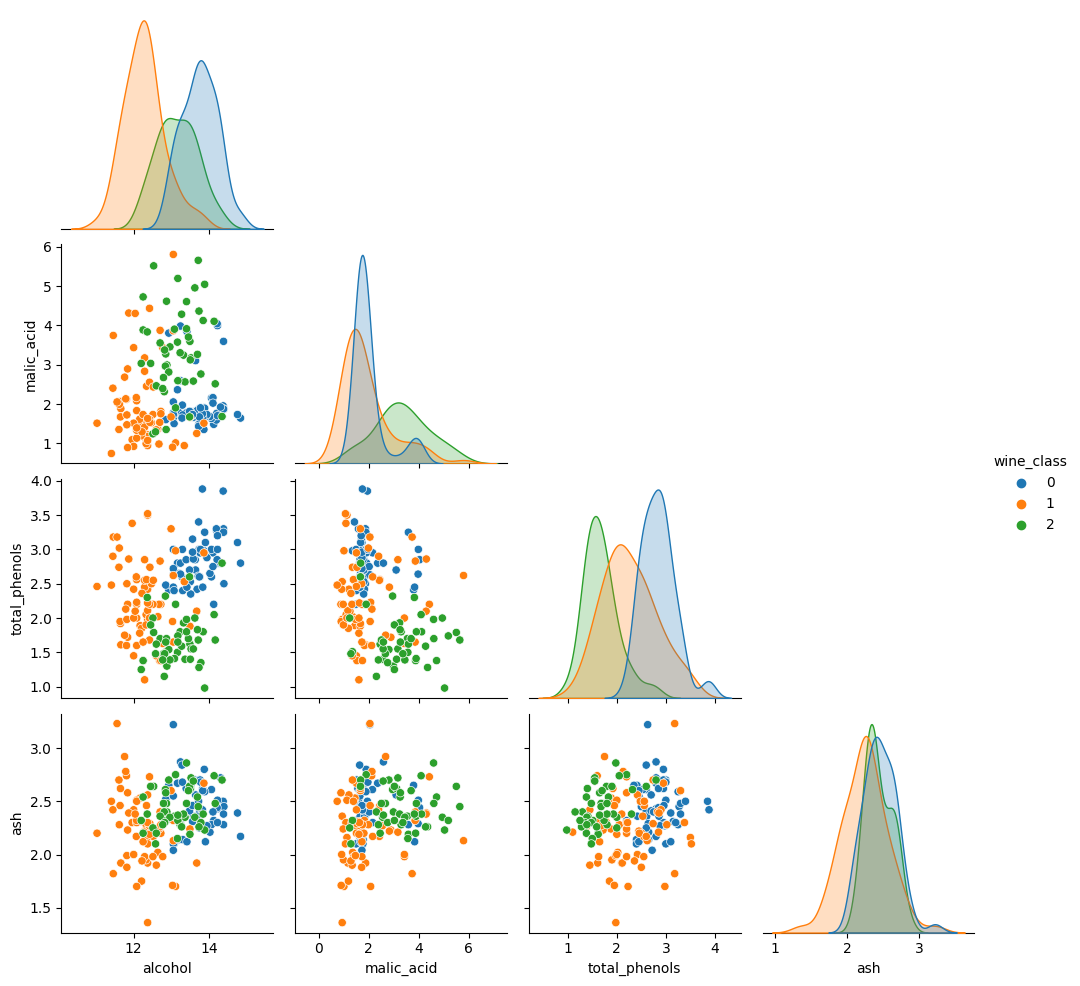

In [211]:
# a subset of features to plot, we check if it is possible to separate the classes 
sns.pairplot(data=df[["alcohol", "malic_acid", "total_phenols", "ash", "wine_class"]], hue="wine_class", corner=True, palette="tab10");

<Axes: >

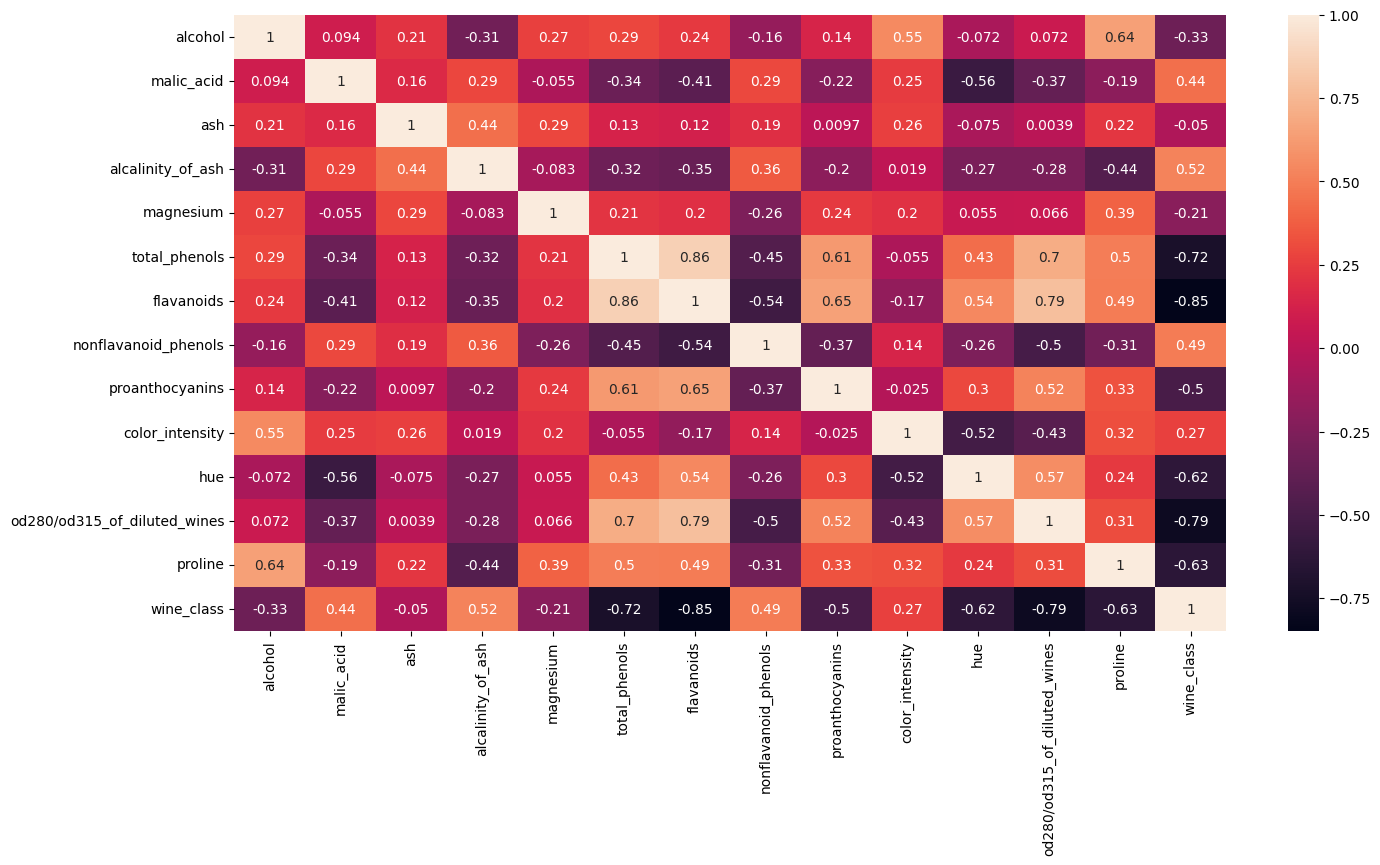

In [212]:
fig = plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(), annot=True)

# drop highly multilinearly correlated features, keep the one with higest correlation to target variables

In [213]:
# drop columns

df = df.drop(columns = "total_phenols")
df = df.drop(columns = "od280/od315_of_diluted_wines")

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,735.0,0


---
## KNN 

KNN or k-nearest neighbours is a supervised machine learning algorithm that can be used for both regression or classification. It calculates the distance between a test data point and all training data, find k training points nearest to the test data. Then it does majority voting to classify that test point to majority of the class of the training data points that are closest. For regression instead it takes an average of those k points that are closest. 

In KNN it is absolute necessity to do feature scaling as the distance calculated using a distance metric can be very wrong if the features are in different scales. 

In [214]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = df.drop("wine_class", axis = "columns"), df["wine_class"]
# want to have somewhat larger test set for evaluation metrics later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # 0.33 first, then 0.5, observe difference in results

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_KNN = KNeighborsClassifier(n_neighbors=1)

model_KNN.fit(scaled_X_train, y_train)

y_pred = model_KNN.predict(scaled_X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       1])

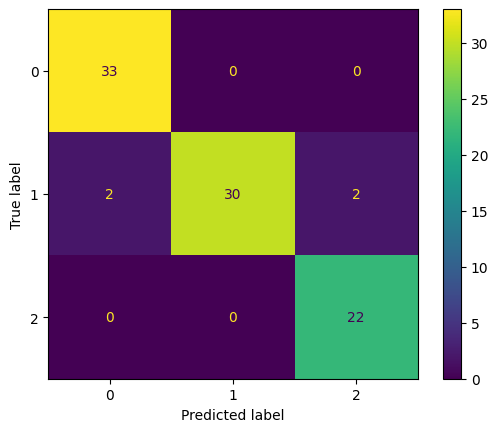

In [215]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [216]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.88      0.94        34
           2       0.92      1.00      0.96        22

    accuracy                           0.96        89
   macro avg       0.95      0.96      0.95        89
weighted avg       0.96      0.96      0.95        89



---
## Elbow plot to choose k 

Note that this is actually cheating as we use the testing data for hyperparameter tuning. This gives us data leakage. A correct way to do it here is to split the data set into train|validation|test sets, perform elbow plot on validation data. Choose a k and do the test on testing data. As our data set is so small, a better way would be to use cross-validation which I will show in the next lecture. Here I will do the cheating method to show the elbow plot

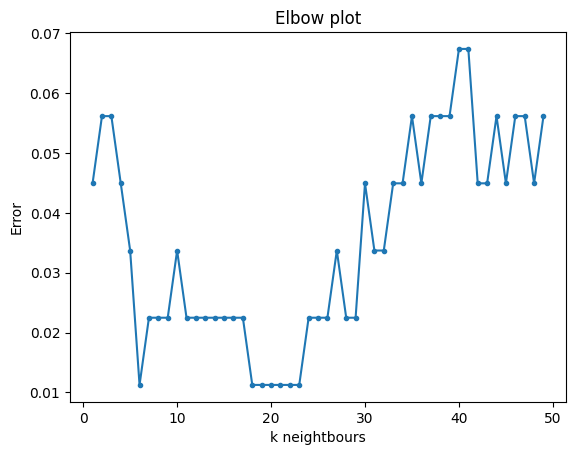

In [217]:
error = 1-accuracy_score(y_test, y_pred)
error_list = []

for k in range(1,50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, y_train)
    y_pred = model_KNN.predict(scaled_X_test)
    error_list.append(1-accuracy_score(y_test, y_pred))

fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, len(error_list)+1), error_list, ".-")
ax.set(title="Elbow plot", xlabel = "k neightbours", ylabel= "Error");

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



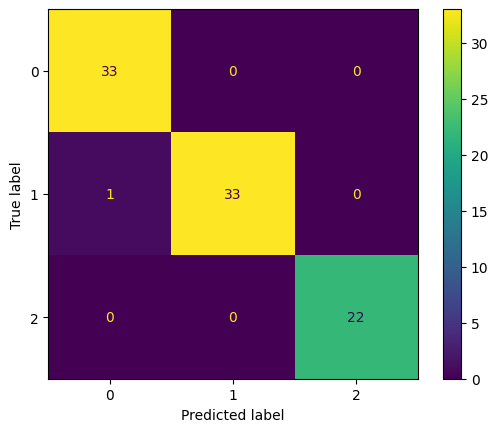

In [219]:
# we choose k = 11 here
model_KNN = KNeighborsClassifier(20)
model_KNN.fit(scaled_X_train, y_train)
y_pred = model_KNN.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
